#Credit Risk Scoring Coursework

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import operator
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, roc_auc_score, plot_roc_curve, accuracy_score, confusion_matrix, classification_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
creditDf = pd.read_excel("GermanCreditData.xlsx", sheet_name="Sheet1")

In [3]:
creditDf

,Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,...,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Bad,Good
0,1,6,4,3,1169,5,5,4,3,1,...,67,3,2,2,3,1,2,1,0,1
1,2,48,2,3,5951,1,3,2,2,1,...,22,3,2,1,3,1,1,1,1,0
2,4,12,4,6,2096,1,4,2,3,1,...,49,3,2,1,2,2,1,1,0,1
3,1,42,2,2,7882,1,4,2,3,3,...,45,3,3,1,3,2,1,1,0,1
4,1,24,3,0,4870,1,3,3,3,1,...,53,3,3,2,3,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,2,1736,1,4,3,2,1,...,31,3,2,1,2,1,1,1,0,1
996,1,30,2,1,3857,1,3,4,1,1,...,40,3,2,1,4,1,2,1,0,1
997,4,12,2,3,804,1,5,4,3,1,...,38,3,2,1,3,1,1,1,0,1
998,1,45,2,3,1845,1,3,4,3,1,...,23,3,3,1,3,1,2,1,1,0


In [4]:
print(creditDf.shape)
print(creditDf.dtypes)

(1000, 22)
Checking      int64
Duration      int64
History       int64
Purpose      object
Amount        int64
Savings       int64
Emploed       int64
Installp      int64
marital       int64
Coapp         int64
Resident      int64
Property      int64
Age           int64
Other         int64
housing       int64
Existcr       int64
Job           int64
Depends       int64
Telephone     int64
Foreign       int64
Bad           int64
Good          int64
dtype: object


###Q1 - Spliting the dataset into two subsets

####Deleting missing data

In [5]:
creditDf.Purpose.value_counts()

3    280
0    234
2    181
1    103
9     97
6     50
5     22
4     12
X     12
8      9
Name: Purpose, dtype: int64

In [6]:
creditDf1 = creditDf[creditDf.Purpose != 'X']
creditDf1 = creditDf1.drop('Bad', axis = 1)
creditDf1

,Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,...,Property,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Good
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,1
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,0
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,1
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,1
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,2,1736,1,4,3,2,1,...,1,31,3,2,1,2,1,1,1,1
996,1,30,2,1,3857,1,3,4,1,1,...,2,40,3,2,1,4,1,2,1,1
997,4,12,2,3,804,1,5,4,3,1,...,3,38,3,2,1,3,1,1,1,1
998,1,45,2,3,1845,1,3,4,3,1,...,4,23,3,3,1,3,1,2,1,0


####Changing data type of features as per data dictionary

In [7]:
creditDf1.describe().T

,count,mean,std,min,25%,50%,75%,max
Checking,988.0,2.586032,1.259488,1.0,1.0,2.0,4.0,4.0
Duration,988.0,20.764170,11.955509,4.0,12.0,18.0,24.0,72.0
History,988.0,2.547571,1.080716,0.0,2.0,2.0,4.0,4.0
Amount,988.0,3211.281377,2710.759455,250.0,1364.0,2302.5,3951.5,15945.0
Savings,988.0,2.108300,1.581111,1.0,1.0,1.0,3.0,5.0
Emploed,988.0,3.388664,1.201465,1.0,3.0,3.0,5.0,5.0
Installp,988.0,2.976721,1.120168,1.0,2.0,3.0,4.0,4.0
marital,988.0,2.683198,0.708782,1.0,2.0,3.0,3.0,4.0
Coapp,988.0,1.140688,0.473668,1.0,1.0,1.0,1.0,3.0
Resident,988.0,2.840081,1.106641,1.0,2.0,3.0,4.0,4.0


In [8]:
creditDf1.columns

Index(['Checking', 'Duration', 'History', 'Purpose', 'Amount', 'Savings',
       'Emploed', 'Installp', 'marital', 'Coapp', 'Resident', 'Property',
       'Age', 'Other', 'housing', 'Existcr', 'Job', 'Depends', 'Telephone',
       'Foreign', 'Good'],
      dtype='object')

In [9]:
cat_columns = ['Checking', 'History', 'Purpose', 'Savings', 'Emploed', 'marital', 'Coapp', 'Property', 
               'Other', 'housing', 'Job', 'Depends', 'Telephone', 'Foreign']
for cat in cat_columns:
  print('{} : {}'.format(cat, set(creditDf1[cat].unique().tolist())))

Checking : {1, 2, 3, 4}
History : {0, 1, 2, 3, 4}
Purpose : {0, 1, 2, 3, 4, 5, 6, 8, 9}
Savings : {1, 2, 3, 4, 5}
Emploed : {1, 2, 3, 4, 5}
marital : {1, 2, 3, 4}
Coapp : {1, 2, 3}
Property : {1, 2, 3, 4}
Other : {1, 2, 3}
housing : {1, 2, 3}
Job : {1, 2, 3, 4}
Depends : {1, 2}
Telephone : {1, 2}
Foreign : {1, 2}


In [10]:
for cat in cat_columns:
  creditDf1[cat] = creditDf1[cat].astype('object')

####Detecting and removing the outliers

In [11]:
'''
delete_outlier: function to delete outliers
args: num_col - numerical column whose outliers needs to be deleted
      dFrame - data frame from which the column is picked
returns: data frame after deleting the outliers
'''
def delete_outlier(num_col, dFrame):
  for x in [num_col]:
    q75,q25 = np.percentile(dFrame.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(2*intr_qr)
    min = q25-(2*intr_qr)
 
    return dFrame[dFrame.loc[dFrame[x] > min,x] & dFrame.loc[dFrame[x] < max,x]]

In [12]:
'''
boxplot_func: function to display box plots
args: dFrame - data frame to pick attributes for box plots
      fea_list - list of total number features whose box plots needs to be displayed
'''
num_cats = ['Duration', 'Amount', 'Installp', 'Resident', 'Age', 'Existcr']
def boxplot_func(dFrame, fea_list):
  f, ax = plt.subplots(1, len(fea_list), figsize=(25,10))
  for i in range(len(fea_list)):
    sns.boxplot(data = dFrame[fea_list[i]], ax = ax[i])
    ax[i].set_xlabel(fea_list[i])

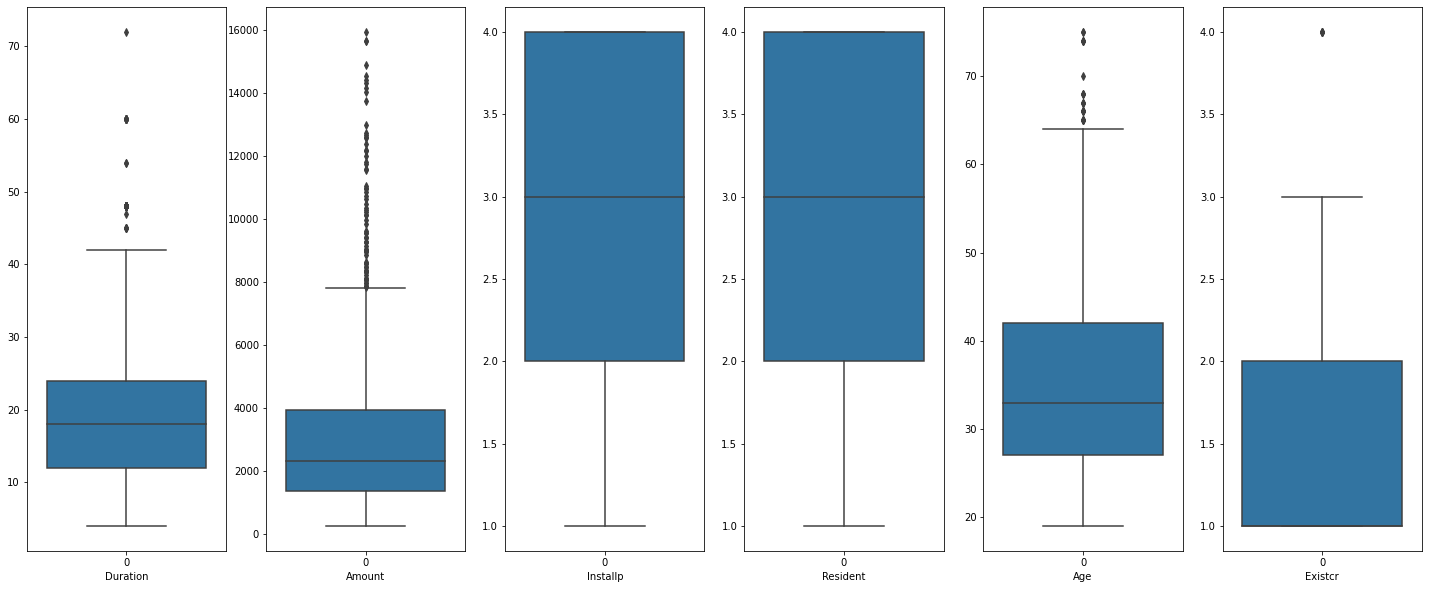

In [13]:
#plotting box plot for the whole data set
boxplot_func(creditDf1, num_cats)
plt.show()

####Divide into two subsets

#####Subset 1

In [14]:
sub1 = creditDf1[creditDf1.Duration <= 12]
sub1.reset_index(drop = True, inplace = True)
sub1

,Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,...,Property,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Good
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,1
1,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,1
2,4,12,2,3,3059,4,4,2,1,1,...,1,61,3,2,1,2,1,1,1,1
3,2,12,2,0,1295,1,2,3,2,1,...,3,25,3,1,1,3,1,1,1,0
4,2,12,2,3,1567,1,3,1,2,1,...,3,22,3,2,1,3,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,6,2,3,753,1,3,2,2,3,...,1,64,3,2,1,3,1,1,1,1
354,4,12,4,6,3565,5,2,2,3,1,...,2,37,3,2,2,2,2,1,1,1
355,4,12,2,0,2390,5,5,4,3,1,...,3,50,3,2,1,3,1,2,1,1
356,4,12,2,2,1736,1,4,3,2,1,...,1,31,3,2,1,2,1,1,1,1


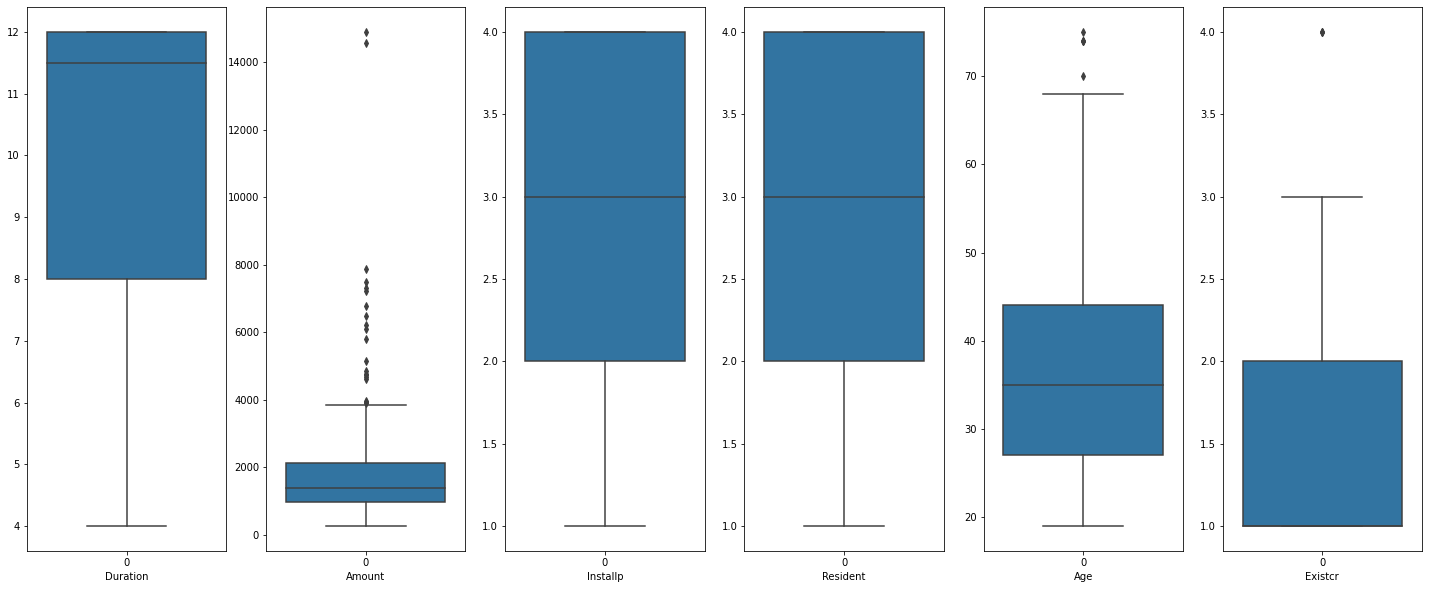

In [15]:
#plotting box plot for subset 1
boxplot_func(sub1, num_cats)
plt.show()

In [16]:
sub1_no_outlier = delete_outlier('Amount', sub1) #deleting outliers for attribute 'Amount'

In [17]:
sub1_no_outlier = delete_outlier('Existcr', sub1_no_outlier) #deleting outliers for attribute 'Existing credits'

In [18]:
sub1_no_outlier = delete_outlier('Age', sub1_no_outlier) #deleting outliers for attribute 'Age'

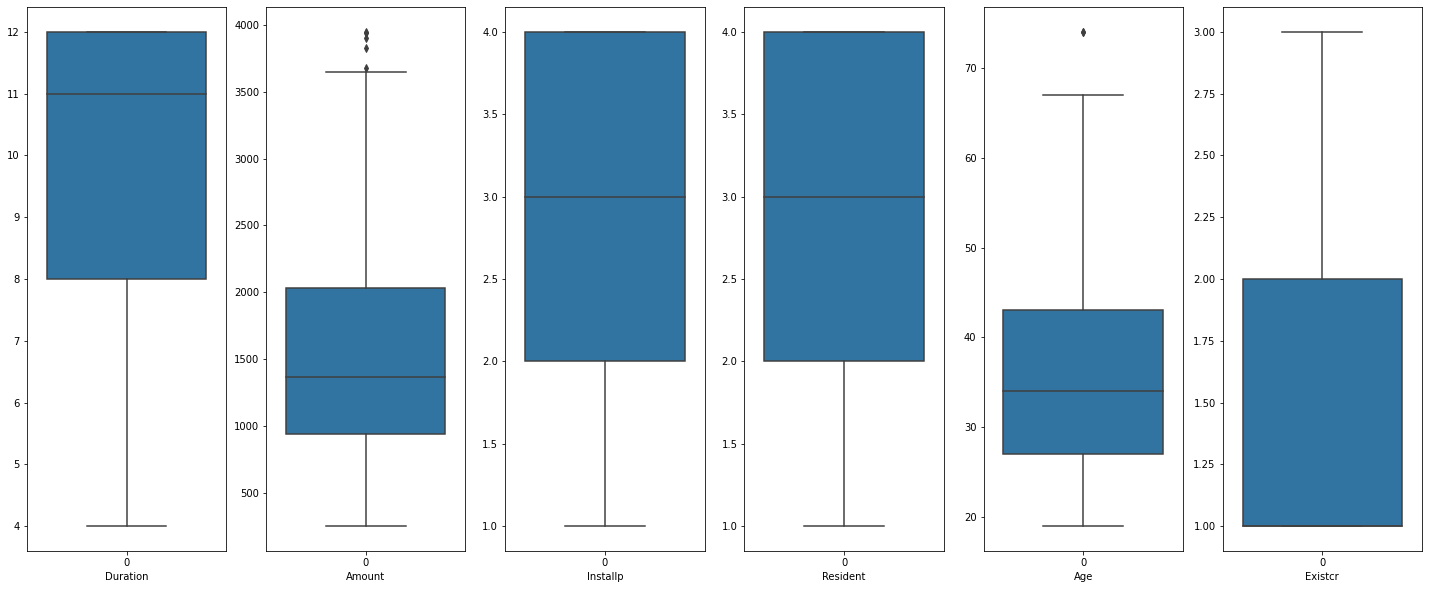

In [19]:
boxplot_func(sub1_no_outlier, num_cats) #box plots of subset 1 after removing the outliers
plt.show()

#####Subset 2

In [20]:
sub2 = creditDf1[creditDf1.Duration > 12]
sub2.reset_index(drop = True, inplace = True)
sub2

,Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,...,Property,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Good
0,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,0
1,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,1
2,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,0
3,4,36,2,6,9055,5,3,2,3,1,...,4,35,3,3,1,2,2,2,1,1
4,4,24,2,2,2835,3,5,3,3,1,...,2,53,3,2,1,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,1,18,2,3,1936,5,4,2,4,1,...,3,23,3,1,2,2,1,1,1,1
626,1,36,2,2,3959,1,1,4,3,1,...,2,30,3,2,1,4,1,2,1,1
627,1,30,2,1,3857,1,3,4,1,1,...,2,40,3,2,1,4,1,2,1,1
628,1,45,2,3,1845,1,3,4,3,1,...,4,23,3,3,1,3,1,2,1,0


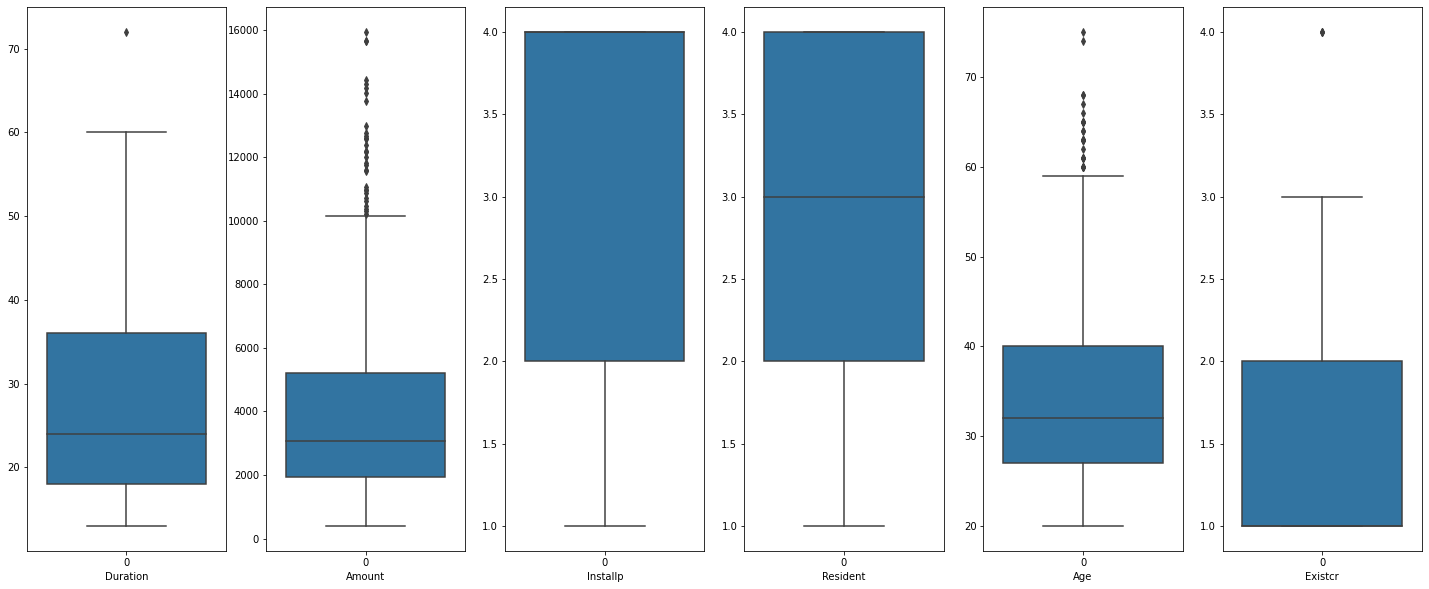

In [21]:
#plotting box plot for subset 2
boxplot_func(sub2, num_cats)
plt.show()

In [22]:
sub2_no_outlier = delete_outlier('Duration', sub2) #deleting outliers for attribute 'Duration'

In [23]:
sub2_no_outlier = delete_outlier('Amount', sub2_no_outlier) #deleting outliers for attribute 'Amount'

In [24]:
sub2_no_outlier = delete_outlier('Age', sub2_no_outlier) #deleting outliers for attribute 'Age'

In [25]:
sub2_no_outlier = delete_outlier('Existcr', sub2_no_outlier) #deleting outliers for attribute 'Existing Credit'

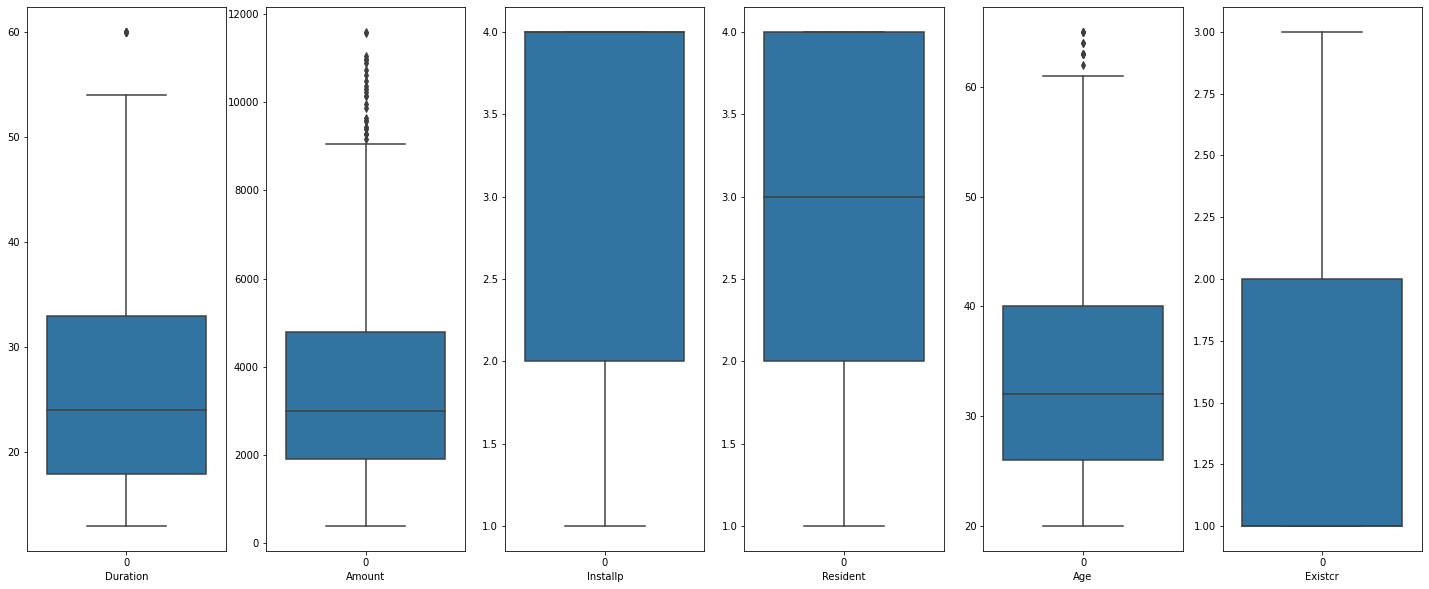

In [26]:
boxplot_func(sub2_no_outlier, num_cats) #box plots of subset 2 after removing the outliers

###Q2 -  Establishing a training set and validation set for each subset

#####Subset1

In [27]:
y_sub1 = sub1_no_outlier.Good
X_sub1 = sub1_no_outlier.drop(['Good'],axis=1)

X_train1, X_val1, y_train1, y_val1 = train_test_split(X_sub1, y_sub1, 
                                                    test_size=0.20,
                                                    stratify= y_sub1, 
                                                    random_state=42)

In [28]:
X_train1

,Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,Resident,Property,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign
295,2,12,0,8,1410,1,3,2,3,1,2,1,31,3,2,1,2,1,2,1
179,2,7,2,3,2576,1,3,2,3,3,2,1,35,3,2,1,3,1,1,1
253,3,12,2,3,1297,1,3,3,4,1,4,1,23,3,1,1,3,1,1,1
284,1,6,2,2,428,1,5,2,2,1,1,2,49,1,2,1,3,1,2,1
356,4,12,2,2,1736,1,4,3,2,1,4,1,31,3,2,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,4,6,2,4,1338,3,3,1,1,1,4,1,62,3,2,1,3,1,1,1
16,3,10,2,4,1225,1,3,2,3,1,2,3,37,3,2,1,3,1,2,1
130,3,4,2,0,1494,5,2,1,3,1,2,1,29,3,2,1,2,2,1,2
221,2,9,2,6,1199,1,4,4,2,1,4,2,67,3,2,2,4,1,2,1


#####Subset2

In [29]:
y_sub2 = sub2_no_outlier.Good
X_sub2 = sub2_no_outlier.drop(["Good"],axis=1)

X_train2, X_val2, y_train2, y_val2 = train_test_split(X_sub2, y_sub2, 
                                                    test_size=0.20,
                                                    stratify = y_sub2,
                                                    random_state=42)

In [30]:
X_train2

,Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,Resident,Property,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign
596,1,28,2,0,4006,1,3,3,3,1,2,3,45,3,2,1,2,1,1,1
358,1,24,1,2,2828,3,3,4,3,1,4,1,22,2,2,1,3,1,2,1
592,2,24,2,1,4113,3,2,3,2,1,4,3,28,3,1,1,3,1,1,1
152,4,24,2,3,999,5,5,4,3,1,2,3,25,3,2,2,3,1,1,1
511,3,15,2,3,2327,1,2,2,2,1,3,1,25,3,2,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,1,24,2,0,1371,5,3,4,2,1,4,1,25,3,1,1,3,1,1,1
553,4,15,4,3,1829,1,5,4,3,1,4,3,46,3,2,2,3,1,2,1
115,2,18,3,2,4297,1,5,4,1,1,3,4,40,3,2,1,4,1,2,1
512,1,24,4,1,2957,1,5,4,3,1,4,2,63,3,2,2,3,1,2,1


###Q3 - (4 variables ->1 continuous, ->1 categorical)

####Heat map - correlation

In [31]:
'''
heat_map_func: function to display heat map
args: dFrame - data frame whose numerical attributes are used to make the heat map
'''
def heat_map_func(dFrame):
  matrix = np.triu(dFrame.corr())
  fig, ax = plt.subplots(figsize=(12,12))
  sns.heatmap(dFrame.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
  plt.show()

####Chi-square Test

In [32]:
'''
cal_chi2: function to calculate chi-square values of categorical attributes
args: dFrame - data frame whose attribute's chi-quare value needs to be calculated
      target_val - target attribute which needs to be predicted
returns: a dictionary with attribute name as its key and respective chi-square values as their values
'''
def cal_chi2(dFrame, target_val):
  chi2_vals = dict()
  for i in cat_columns:
    chi2_val, p_val = chi2(np.array(dFrame[i]).reshape(-1, 1), np.array(target_val).reshape(-1, 1))
    chi2_vals[i] = chi2_val
  return sorted(chi2_vals.items(), key = operator.itemgetter(1), reverse = True)

#####Subset 1

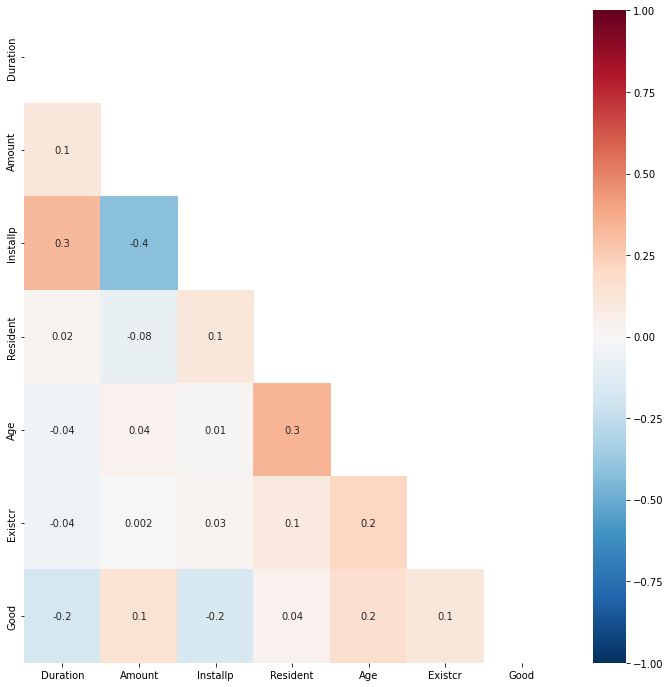

In [33]:
heat_map_func(sub1_no_outlier)

Choosing '*Duration*', '*Installp*' and '*Age*' as top three numerical values

In [34]:
cal_chi2(X_sub1, y_sub1)

[('Checking', array([16.70168294])),
 ('History', array([8.82323097])),
 ('Property', array([5.09090178])),
 ('Savings', array([4.24726027])),
 ('Emploed', array([0.96841632])),
 ('Other', array([0.76832167])),
 ('Coapp', array([0.72851146])),
 ('Telephone', array([0.38032269])),
 ('Foreign', array([0.35871192])),
 ('marital', array([0.33274731])),
 ('Purpose', array([0.30075295])),
 ('Depends', array([0.1741004])),
 ('housing', array([0.06464254])),
 ('Job', array([0.01517491]))]

Choosing '*Checking*', '*History*' and '*Property*' as top three categorical values

####Regression

In [35]:
reg_values = dict()

formula = 'Good ~ Checking+Duration+History+Installp'
fit = sm.OLS.from_formula(formula, sub1_no_outlier).fit()
reg_values['Checking+Duration+History+Installp'] = fit.rsquared

formula = 'Good ~ Checking+Duration+History+Property'
fit = sm.OLS.from_formula(formula, sub1_no_outlier).fit()
reg_values['Checking+Duration+History+Property'] = fit.rsquared

formula = 'Good ~ Checking+Duration+History+Age'
fit = sm.OLS.from_formula(formula, sub1_no_outlier).fit()
reg_values['Checking+Duration+History+Age'] = fit.rsquared

formula = 'Good ~ Checking+Duration+Property+Installp'
fit = sm.OLS.from_formula(formula, sub1_no_outlier).fit()
reg_values['Checking+Duration+Property+Installp'] = fit.rsquared

formula = 'Good ~ Checking+Duration+Property+Age'
fit = sm.OLS.from_formula(formula, sub1_no_outlier).fit()
reg_values['Checking+Duration+Property+Age'] = fit.rsquared

formula = 'Good ~ Checking+Duration+Installp+Age'
fit = sm.OLS.from_formula(formula, sub1_no_outlier).fit()
reg_values['Checking+Duration+Installp+Age'] = fit.rsquared

formula = 'Good ~ Checking+History+Installp+Age'
fit = sm.OLS.from_formula(formula, sub1_no_outlier).fit()
reg_values['Checking+History+Installp+Age'] = fit.rsquared

formula = 'Good ~ Checking+History+Installp+Property'
fit = sm.OLS.from_formula(formula, sub1_no_outlier).fit()
reg_values['Checking+History+Installp+Property'] = fit.rsquared

formula = 'Good ~ Checking+History+Age+Property'
fit = sm.OLS.from_formula(formula, sub1_no_outlier).fit()
reg_values['Checking+History+Age+Property'] = fit.rsquared

formula = 'Good ~ Checking+Property+Installp+Age'
fit = sm.OLS.from_formula(formula, sub1_no_outlier).fit()
reg_values['Checking+Property+Installp+Age'] = fit.rsquared

formula = 'Good ~ History+Property+Installp+Age'
fit = sm.OLS.from_formula(formula, sub1_no_outlier).fit()
reg_values['History+Property+Installp+Age'] = fit.rsquared

formula = 'Good ~ History+Property+Installp+Duration'
fit = sm.OLS.from_formula(formula, sub1_no_outlier).fit()
reg_values['History+Property+Installp+Duration'] = fit.rsquared

formula = 'Good ~ History+Property+Age+Duration'
fit = sm.OLS.from_formula(formula, sub1_no_outlier).fit()
reg_values['History+Property+Age+Duration'] = fit.rsquared

formula = 'Good ~ History+Age+Installp+Duration'
fit = sm.OLS.from_formula(formula, sub1_no_outlier).fit()
reg_values['History+Age+Installp+Duration'] = fit.rsquared

formula = 'Good ~ Age+Property+Installp+Duration'
fit = sm.OLS.from_formula(formula, sub1_no_outlier).fit()
reg_values['Age+Property+Installp+Duration'] = fit.rsquared

max(reg_values, key = reg_values.get) #printing the combination of attributes with highest value

'Checking+Duration+History+Property'

As per the above result I choose '**CHECKING**', '**DURATION**', '**HISTORY**' and '**PROPERTY**' as my four features for building the scorecard.

In [36]:
X_train1 = X_train1[['Checking','Duration', 'History', 'Property']]
X_val1 = X_val1[['Checking','Duration', 'History', 'Property']]

#####Subset2

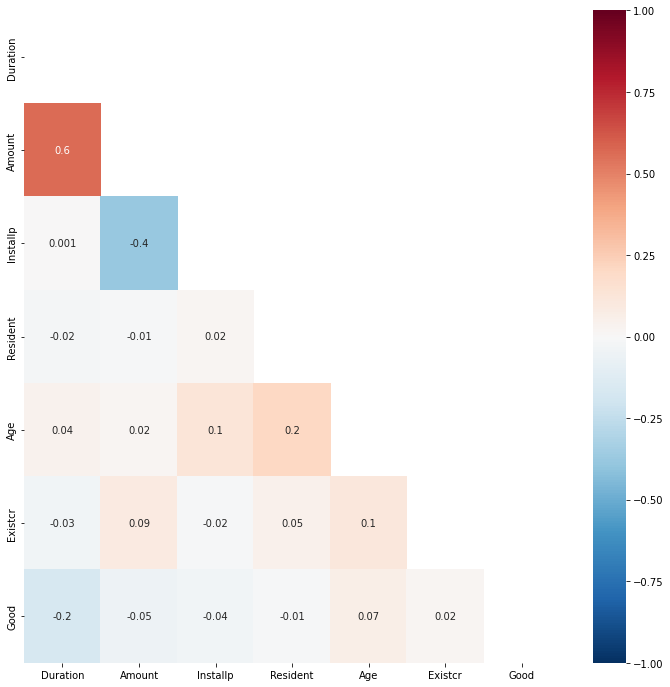

In [37]:
heat_map_func(sub2_no_outlier)

Choosing '*Duration*', '*Amount*' and '*Age*' as top three numerical values

In [38]:
cal_chi2(X_sub2, y_sub2)

[('Checking', array([56.22349417])),
 ('Savings', array([38.79394161])),
 ('History', array([9.89577398])),
 ('Emploed', array([7.45272724])),
 ('marital', array([1.32174478])),
 ('Other', array([1.09497223])),
 ('Telephone', array([1.03795393])),
 ('Property', array([0.57753974])),
 ('housing', array([0.47866319])),
 ('Depends', array([0.18233827])),
 ('Job', array([0.15684333])),
 ('Coapp', array([0.05746193])),
 ('Purpose', array([0.03582675])),
 ('Foreign', array([0.00361933]))]

Choosing '*Checking*', '*History*' and '*Savings*' as top three categorical values

####Regression

In [39]:
reg_values.clear()

formula = 'Good ~ Checking+Duration+History+Amount'
fit = sm.OLS.from_formula(formula, creditDf1).fit()
reg_values['Checking+Duration+History+Amount'] = fit.rsquared

formula = 'Good ~ Checking+Duration+History+Savings'
fit = sm.OLS.from_formula(formula, creditDf1).fit()
reg_values['Checking+Duration+History+Savings'] = fit.rsquared

formula = 'Good ~ Checking+Duration+History+Age'
fit = sm.OLS.from_formula(formula, creditDf1).fit()
reg_values['Checking+Duration+History+Age'] = fit.rsquared

formula = 'Good ~ Checking+Duration+Savings+Amount'
fit = sm.OLS.from_formula(formula, creditDf1).fit()
reg_values['Checking+Duration+Savings+Amount'] = fit.rsquared

formula = 'Good ~ Checking+Duration+Savings+Age'
fit = sm.OLS.from_formula(formula, creditDf1).fit()
reg_values['Checking+Duration+Savings+Age'] = fit.rsquared

formula = 'Good ~ Checking+Duration+Amount+Age'
fit = sm.OLS.from_formula(formula, creditDf1).fit()
reg_values['Checking+Duration+Amount+Age'] = fit.rsquared

formula = 'Good ~ Checking+History+Amount+Age'
fit = sm.OLS.from_formula(formula, creditDf1).fit()
reg_values['Checking+History+Amount+Age'] = fit.rsquared

formula = 'Good ~ Checking+History+Amount+Savings'
fit = sm.OLS.from_formula(formula, creditDf1).fit()
reg_values['Checking+History+Amount+Savings'] = fit.rsquared

formula = 'Good ~ Checking+History+Age+Savings'
fit = sm.OLS.from_formula(formula, creditDf1).fit()
reg_values['Checking+History+Age+Savings'] = fit.rsquared

formula = 'Good ~ Checking+Savings+Amount+Age'
fit = sm.OLS.from_formula(formula, creditDf1).fit()
reg_values['Checking+Savings+Amount+Age'] = fit.rsquared

formula = 'Good ~ History+Savings+Amount+Age'
fit = sm.OLS.from_formula(formula, creditDf1).fit()
reg_values['History+Savings+Amount+Age'] = fit.rsquared

formula = 'Good ~ History+Savings+Amount+Duration'
fit = sm.OLS.from_formula(formula, creditDf1).fit()
reg_values['History+Savings+Amount+Duration'] = fit.rsquared

formula = 'Good ~ History+Savings+Age+Duration'
fit = sm.OLS.from_formula(formula, creditDf1).fit()
reg_values['History+Savings+Age+Duration'] = fit.rsquared

formula = 'Good ~ History+Age+Amount+Duration'
fit = sm.OLS.from_formula(formula, creditDf1).fit()
reg_values['History+Age+Amount+Duration'] = fit.rsquared

formula = 'Good ~ Age+Savings+Amount+Duration'
fit = sm.OLS.from_formula(formula, creditDf1).fit()
reg_values['Age+Savings+Amount+Duration'] = fit.rsquared

max(reg_values, key = reg_values.get) #printing the combination of attributes with highest value

'Checking+Duration+History+Savings'

As per the above result I choose '**CHECKING**', '**DURATION**', '**HISTORY**' and '**SAVINGS**' as my four features for building the scorecard.

In [40]:
X_train2 = X_train2[['Checking', 'Duration', 'History', 'Savings']]
X_val2 = X_val2[['Checking', 'Duration', 'History', 'Savings']]

###Q4 - Score Cards

####Binning


#####Subset 1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


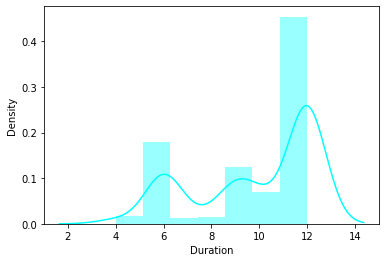

In [41]:
sns.distplot(sub1_no_outlier.Duration, color = 'cyan')

In [42]:
pd.qcut(sub1_no_outlier['Duration'], q = 2).value_counts()

(3.999, 11.0]    169
(11.0, 12.0]     168
Name: Duration, dtype: int64

In [43]:
X_train1_binned = X_train1.copy(deep = True)
X_train1_binned['Duration_bin'] = pd.cut(X_train1_binned.Duration, bins = [3, 11, 12])
X_train1_binned = X_train1_binned.drop('Duration', axis = 1)
X_val1_binned = X_val1.copy(deep = True)
X_val1_binned['Duration_bin'] = pd.cut(X_val1_binned.Duration, bins = [3, 11, 12])
X_val1_binned = X_val1_binned.drop('Duration', axis = 1)

In [44]:
print(X_train1_binned)
print(X_val1_binned)

    Checking History Property Duration_bin
295        2       0        1     (11, 12]
179        2       2        1      (3, 11]
253        3       2        1     (11, 12]
284        1       2        2      (3, 11]
356        4       2        1     (11, 12]
..       ...     ...      ...          ...
307        4       2        1      (3, 11]
16         3       2        3      (3, 11]
130        3       2        1      (3, 11]
221        2       2        2      (3, 11]
91         2       2        1     (11, 12]

[269 rows x 4 columns]
    Checking History Property Duration_bin
88         4       4        1      (3, 11]
154        3       2        1     (11, 12]
62         4       2        2      (3, 11]
278        4       4        1      (3, 11]
224        1       2        3     (11, 12]
..       ...     ...      ...          ...
192        2       4        1     (11, 12]
153        4       4        3      (3, 11]
100        4       4        2     (11, 12]
172        2       2        1 

#####Subset 2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


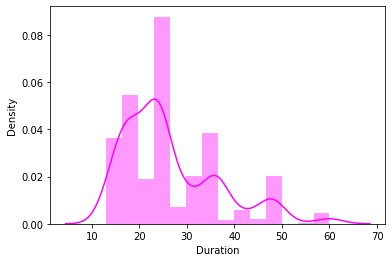

In [45]:
sns.distplot(sub2_no_outlier.Duration, color = 'Magenta')

In [46]:
pd.qcut(sub2_no_outlier.Duration, q = 3).value_counts()

(12.999, 21.0]    219
(27.0, 60.0]      192
(21.0, 27.0]      190
Name: Duration, dtype: int64

In [47]:
X_train2_binned = X_train2.copy(deep = True)
X_train2_binned['Duration_bin'] = pd.cut(X_train2_binned.Duration, bins = [12, 21, 27, 60])
X_train2_binned = X_train2_binned.drop('Duration', axis = 1)
X_train2_binned

,Checking,History,Savings,Duration_bin
596,1,2,1,"(27, 60]"
358,1,1,3,"(21, 27]"
592,2,2,3,"(21, 27]"
152,4,2,5,"(21, 27]"
511,3,2,1,"(12, 21]"
...,...,...,...,...
470,1,2,5,"(21, 27]"
553,4,4,1,"(12, 21]"
115,2,3,1,"(12, 21]"
512,1,4,1,"(21, 27]"


In [48]:
X_val2_binned = X_val2.copy(deep = True)
X_val2_binned['Duration_bin'] = pd.cut(X_val2_binned.Duration, bins = [12, 21, 27, 60])
X_val2_binned = X_val2_binned.drop('Duration', axis = 1)
X_val2_binned

,Checking,History,Savings,Duration_bin
300,4,4,1,"(27, 60]"
587,1,1,3,"(21, 27]"
16,2,2,4,"(12, 21]"
521,4,2,1,"(21, 27]"
252,4,4,1,"(27, 60]"
...,...,...,...,...
217,1,1,1,"(27, 60]"
249,4,2,4,"(12, 21]"
314,2,4,1,"(12, 21]"
406,4,4,1,"(27, 60]"


####One Hot *Encoding*

#####Subset 1

In [49]:
X_train1_hotEncoding = pd.get_dummies(X_train1_binned, columns = ['Checking', 'History', 'Property', 'Duration_bin'], drop_first = True)
X_train1_hotEncoding

,Checking_2,Checking_3,Checking_4,History_1,History_2,History_3,History_4,Property_2,Property_3,Property_4,"Duration_bin_(11, 12]"
295,1,0,0,0,0,0,0,0,0,0,1
179,1,0,0,0,1,0,0,0,0,0,0
253,0,1,0,0,1,0,0,0,0,0,1
284,0,0,0,0,1,0,0,1,0,0,0
356,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
307,0,0,1,0,1,0,0,0,0,0,0
16,0,1,0,0,1,0,0,0,1,0,0
130,0,1,0,0,1,0,0,0,0,0,0
221,1,0,0,0,1,0,0,1,0,0,0


In [50]:
X_val1_hotEncoding = pd.get_dummies(X_val1_binned, columns = ['Checking', 'History', 'Property', 'Duration_bin'], drop_first = True)
X_val1_hotEncoding

,Checking_2,Checking_3,Checking_4,History_1,History_2,History_3,History_4,Property_2,Property_3,Property_4,"Duration_bin_(11, 12]"
88,0,0,1,0,0,0,1,0,0,0,0
154,0,1,0,0,1,0,0,0,0,0,1
62,0,0,1,0,1,0,0,1,0,0,0
278,0,0,1,0,0,0,1,0,0,0,0
224,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
192,1,0,0,0,0,0,1,0,0,0,1
153,0,0,1,0,0,0,1,0,1,0,0
100,0,0,1,0,0,0,1,1,0,0,1
172,1,0,0,0,1,0,0,0,0,0,1


#####Subset 2

In [51]:
X_train2_hotEncoding = pd.get_dummies(X_train2_binned, columns = ['Checking', 'History', 'Savings', 'Duration_bin'], drop_first = True)
X_train2_hotEncoding

,Checking_2,Checking_3,Checking_4,History_1,History_2,History_3,History_4,Savings_2,Savings_3,Savings_4,Savings_5,"Duration_bin_(21, 27]","Duration_bin_(27, 60]"
596,0,0,0,0,1,0,0,0,0,0,0,0,1
358,0,0,0,1,0,0,0,0,1,0,0,1,0
592,1,0,0,0,1,0,0,0,1,0,0,1,0
152,0,0,1,0,1,0,0,0,0,0,1,1,0
511,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0,0,0,0,1,0,0,0,0,0,1,1,0
553,0,0,1,0,0,0,1,0,0,0,0,0,0
115,1,0,0,0,0,1,0,0,0,0,0,0,0
512,0,0,0,0,0,0,1,0,0,0,0,1,0


In [52]:
X_val2_hotEncoding = pd.get_dummies(X_val2_binned, columns = ['Checking', 'History', 'Savings', 'Duration_bin'], drop_first = True)
X_val2_hotEncoding

,Checking_2,Checking_3,Checking_4,History_1,History_2,History_3,History_4,Savings_2,Savings_3,Savings_4,Savings_5,"Duration_bin_(21, 27]","Duration_bin_(27, 60]"
300,0,0,1,0,0,0,1,0,0,0,0,0,1
587,0,0,0,1,0,0,0,0,1,0,0,1,0
16,1,0,0,0,1,0,0,0,0,1,0,0,0
521,0,0,1,0,1,0,0,0,0,0,0,1,0
252,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0,0,0,1,0,0,0,0,0,0,0,0,1
249,0,0,1,0,1,0,0,0,0,1,0,0,0
314,1,0,0,0,0,0,1,0,0,0,0,0,0
406,0,0,1,0,0,0,1,0,0,0,0,0,1


####Linear Regession

#####Subset 1

In [110]:
sub1_lin_reg = LinearRegression().fit(X_train1_hotEncoding, y_train1)

In [111]:
lin_y1_pred = sub1_lin_reg.predict(X_val1_hotEncoding)

In [112]:
print('Mean absolute error: ', mean_absolute_error(lin_y1_pred, y_val1))

Mean absolute error:  0.3265576679041756


In [113]:
print('Coefficient of linear regression are: ', sub1_lin_reg.coef_)
print('Intercept of linear regression is: ', sub1_lin_reg.intercept_)

Coefficient of linear regression are:  [ 0.13431191  0.19648927  0.31568019 -0.19557499  0.09217485  0.06026715
  0.19249396 -0.10632729 -0.12205408 -0.23510932 -0.1271089 ]
Intercept of linear regression is:  0.6437648631573183


In [114]:
print('Cross validation score: ', cross_val_score(sub1_lin_reg, X_val1_hotEncoding, y_val1, cv = 10, scoring = 'r2').mean())

Cross validation score:  -0.04993687549322362


#####Subset 2

In [116]:
sub2_lin_reg = LinearRegression().fit(X_train2_hotEncoding, y_train2)

In [118]:
lin_y2_pred = sub2_lin_reg.predict(X_val2_hotEncoding)

In [119]:
print('Mean absolute error: ', mean_absolute_error(lin_y2_pred, y_val2))

Mean absolute error:  0.33980510256361374


In [120]:
print('Coefficient of linear regression are: ', sub2_lin_reg.coef_)
print('Intercept of linear regression is: ', sub2_lin_reg.intercept_)

Coefficient of linear regression are:  [ 0.11422514  0.22345093  0.33721141  0.04642994  0.15489736  0.13652665
  0.26259464  0.06637097  0.13393536  0.15978113  0.15543364 -0.01364441
 -0.08213656]
Intercept of linear regression is:  0.2945425989886634


In [121]:
print('Cross validation score: ', cross_val_score(sub2_lin_reg, X_val2_hotEncoding, y_val2, cv = 7, scoring = 'r2').mean())

Cross validation score:  -0.0098304519568575


####Logistic Regression

#####Subset 1

In [91]:
log_reg_sub1 = LogisticRegression(solver = 'liblinear').fit(X_train1_hotEncoding, y_train1)

In [92]:
log_y1_pred = log_reg_sub1.predict(X_val1_hotEncoding)

In [93]:
print('Intercept of linear regression is: ', log_reg_sub1.intercept_)
print('Coefficient of linear regression are: ', log_reg_sub1.coef_)

Intercept of linear regression is:  [0.87294303]
Coefficient of linear regression are:  [[ 0.44519713  0.68171475  1.91895163 -0.71149963  0.45457823  0.15544321
   1.15751006 -0.53747934 -0.60035503 -1.23196116 -0.79220409]]


In [94]:

print('Cross validation score: ', cross_val_score(log_reg_sub1, X_val1_hotEncoding, y_val1, cv = 10).mean())

Cross validation score:  0.7952380952380951


In [95]:
print('Mean absolute error: ', mean_absolute_error(log_y1_pred, y_val1))

Mean absolute error:  0.23529411764705882


In [96]:
con_mat1 = confusion_matrix(y_val1, log_y1_pred)
print('Confusion Matrix:')
con_mat1

Confusion Matrix:


array([[ 3, 11],
       [ 5, 49]])

In [97]:
print('Accuracy score: ', accuracy_score(y_val1, log_y1_pred))

Accuracy score:  0.7647058823529411


#####Subset 2

In [98]:
log_reg_sub2 = LogisticRegression(solver = 'liblinear').fit(X_train2_hotEncoding, y_train2)

In [99]:
log_y2_pred = log_reg_sub2.predict(X_val2_hotEncoding)

In [100]:
print('Intercept of linear regression is: ', log_reg_sub2.intercept_)
print('Coefficient of linear regression are: ', log_reg_sub2.coef_)

Intercept of linear regression is:  [-0.48480987]
Coefficient of linear regression are:  [[ 0.36283568  0.77170273  1.58689788 -0.15541913  0.31731441  0.19470033
   0.91307298  0.28138642  0.60558113  0.83442959  0.78847498 -0.03317443
  -0.3974845 ]]


In [101]:
print('Cross validation score: ', cross_val_score(log_reg_sub2, X_val2_hotEncoding, y_val2, cv = 7).mean())

Cross validation score:  0.7591036414565826


In [102]:
print('Mean absolute error: ', mean_absolute_error(log_y2_pred, y_val2))

Mean absolute error:  0.2396694214876033


In [103]:
con_mat2 = confusion_matrix(y_val2, log_y2_pred)
print('Confusion Matrix:')
con_mat2

Confusion Matrix:


array([[22, 19],
       [10, 70]])

In [104]:
print('Accuracy score: ', accuracy_score(y_val2, log_y2_pred))

Accuracy score:  0.7603305785123967


##Q5

####ROC curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


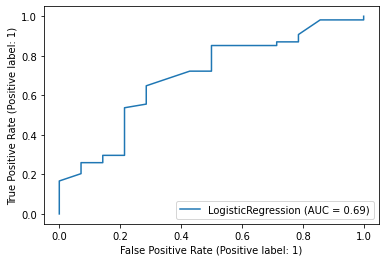

In [123]:
roc_sub1 = plot_roc_curve(log_reg_sub1, X_val1_hotEncoding, y_val1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


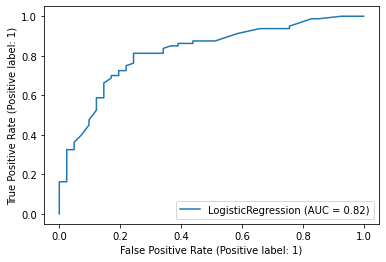

In [124]:
roc_sub2 = plot_roc_curve(log_reg_sub2, X_val2_hotEncoding, y_val2)

####Sensitivity and Specificity

In [126]:
sens = con_mat1[0,0]/(con_mat1[0,0] + con_mat1[1,0])
spec = con_mat1[1,1]/(con_mat1[0,1] + con_mat1[1,1])
print('Sensitivity for subset 1: ', sens)
print('Specificity for subset 1: ', spec)

Sensitivity for subset 1:  0.375
Specificity for subset 1:  0.8166666666666667


In [125]:
sens = con_mat2[0,0]/(con_mat2[0,0] + con_mat2[1,0])
spec = con_mat2[1,1]/(con_mat2[0,1] + con_mat2[1,1])
print('Sensitivity for subset 2: ', sens)
print('Specificity for subset 2: ', spec)

Sensitivity for subset 2:  0.6875
Specificity for subset 2:  0.7865168539325843


####Gini Coefficient

#####Subset 1

In [135]:
auroc = roc_auc_score(y_val1, log_y1_pred)
print('Area under the ROC curve of subset 1 is: ', auroc)

Area under the ROC curve of subset 1 is:  0.5608465608465609


In [136]:
gini_cof = 2*auroc - 1
print('Gini coefficient for subset 1: ', gini_cof)

Gini coefficient for subset 1:  0.12169312169312185


#####Subset 2

In [137]:
auroc = roc_auc_score(y_val2, log_y2_pred)
print('Area under the ROC curve of subset 2 is: ', auroc)

Area under the ROC curve of subset 2 is:  0.7057926829268293


In [138]:
gini_cof = 2*auroc - 1
print('Gini coefficient for subset 2: ', gini_cof)

Gini coefficient for subset 2:  0.41158536585365857


####KS statistics

#####Subset 1

In [140]:
ks_stat = (con_mat1[1,1]/(con_mat1[0,1] + con_mat1[1,1])) - (con_mat1[1,0]/(con_mat1[0,0] + con_mat1[1,0]))
print('KS statistics value for subset 1 is: ', abs(ks_stat))

KS statistics value for subset 1 is:  0.19166666666666665


#####Subset 2

In [139]:
ks_stat = (con_mat2[1,1]/(con_mat2[0,1] + con_mat2[1,1])) - (con_mat2[1,0]/(con_mat2[0,0] + con_mat2[1,0]))
print('KS statistics value for subset 1 is: ', abs(ks_stat))

KS statistics value for subset 1 is:  0.4740168539325843
